# Time Series Data Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset from csv file

df = pd.read_csv("../DATA/time_series_data.csv")
df.head()

,date,value
0,2022-01-01 00:00:00,0.897366
1,2022-01-01 01:00:00,0.389095
2,2022-01-01 02:00:00,0.849054
3,2022-01-01 03:00:00,0.526571
4,2022-01-01 04:00:00,0.403405


In [3]:
# Details of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    25 non-null     object 
 1   value   25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


In [4]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    25 non-null     datetime64[ns]
 1   value   25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 532.0 bytes


In [5]:
# Mark date column as index

df.set_index("date",inplace=True)
df.head()

,value
date,
2022-01-01 00:00:00,0.897366
2022-01-01 01:00:00,0.389095
2022-01-01 02:00:00,0.849054
2022-01-01 03:00:00,0.526571
2022-01-01 04:00:00,0.403405


In [6]:
# Resample max values per day
max_df = df.resample('D').max()
max_df

,value
date,
2022-01-01,0.966448
2022-01-02,0.922851


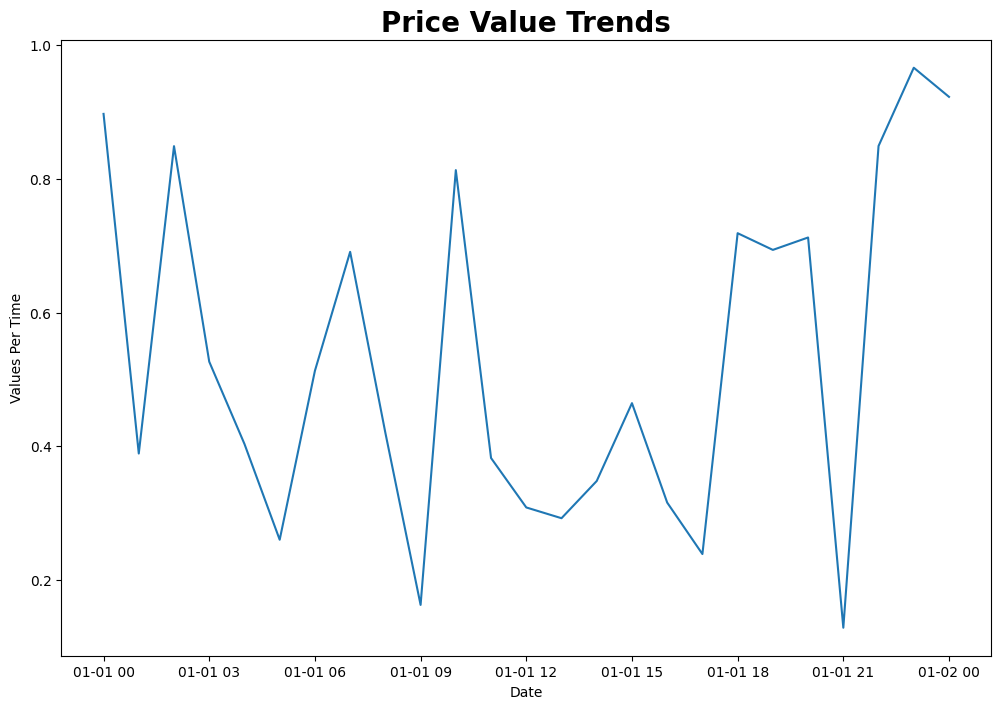

In [7]:
# Line plot of dataset

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df.index, df)
ax.set(xlabel='Date',ylabel='Values Per Time')
plt.title(label="Price Value Trends",
          fontdict={'fontsize':20, 'fontweight':'bold'})
plt.show()

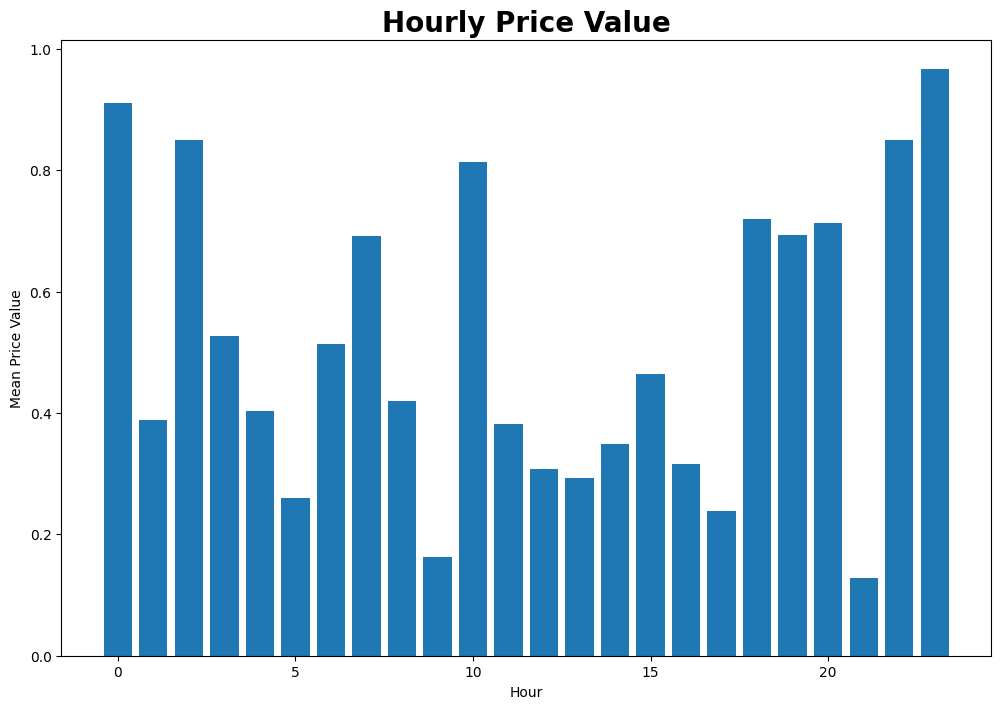

In [8]:
# Bar plot of mean per hour

# Group by hour
hour_df = df.groupby(df.index.hour).mean()
# hour_df
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(hour_df.index, hour_df.value)
ax.set(xlabel='Hour',ylabel='Mean Price Value')
plt.title(label="Hourly Price Value",
          fontdict={'fontsize':20, 'fontweight':'bold'})
plt.show()

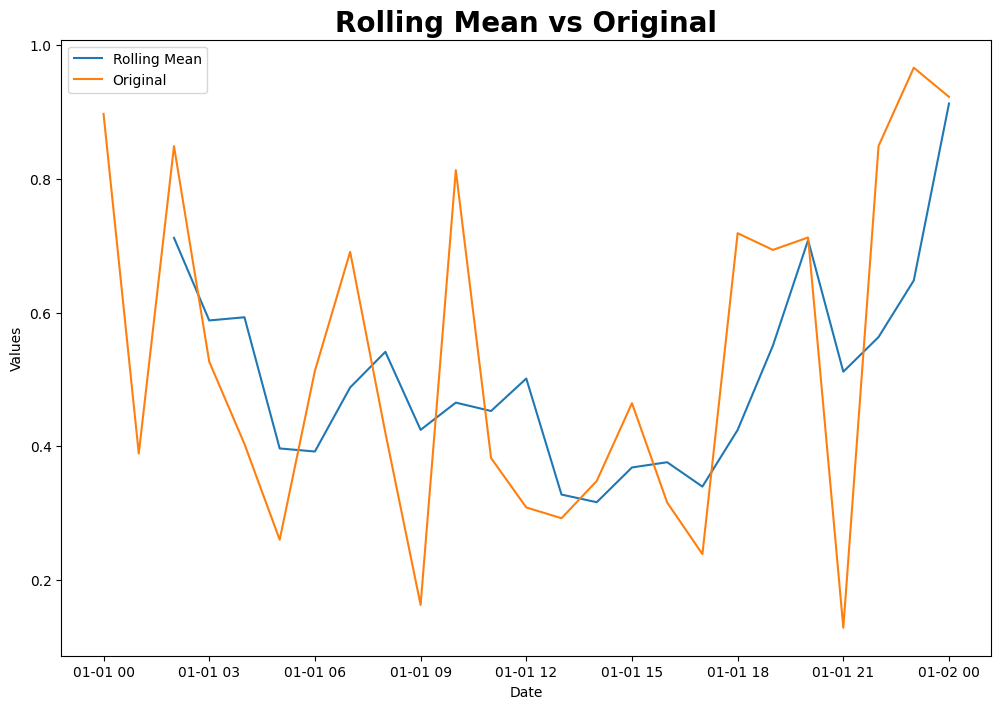

In [9]:
# Plot of rolling average and original value

# Compute rolling average
rolling_mean = df.rolling(window=3).mean()
# rolling_mean

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(rolling_mean.index,rolling_mean.values,label="Rolling Mean")
ax.plot(df.index,df['value'],label='Original')
ax.set(xlabel='Date',ylabel='Values')
plt.title(label="Rolling Mean vs Original",
          fontdict={'fontsize':20, 'fontweight':'bold'})
plt.legend()
plt.show()
